In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
test['Survived'] = np.nan

full = pd.concat([train,test])

In [4]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
full.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
full.isnull().mean().sort_values()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Embarked       0.001528
Age            0.200917
Survived       0.319328
Cabin          0.774637
dtype: float64

In [7]:
from statistics import mode
full['Embarked'] = full['Embarked'].fillna(mode(full['Embarked']))

In [8]:
full['Sex'][full['Sex']=='male'] = 0
full['Sex'][full['Sex']=='female'] = 1

full['Embarked'][full['Embarked']=='S'] = 0
full['Embarked'][full['Embarked']=='C'] = 1
full['Embarked'][full['Embarked']=='Q'] = 2

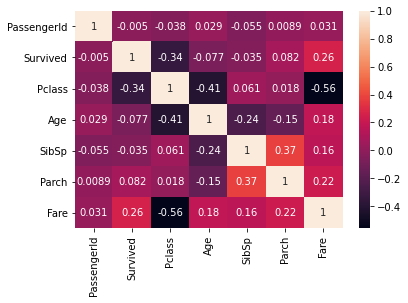

In [9]:
sns.heatmap(full.corr(),annot=True)

In [10]:
full['Age'] = full.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [11]:
full['Fare'] = full.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [12]:
full['Cabin'] = full['Cabin'].fillna('U')

In [13]:
full.isnull().mean().sort_values()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.000000
Survived       0.319328
dtype: float64

In [14]:
full['Cabin'].unique().tolist()

['U',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [15]:
import re

full['Cabin'] = full['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())

In [16]:
full['Cabin'].unique().tolist()

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [17]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}

full['Cabin'] = full['Cabin'].map(cabin_category)
full['Cabin'].unique().tolist()

[9, 3, 5, 7, 4, 1, 2, 6, 8]

In [18]:
full['Cabin'].head()

0    9
1    3
2    9
3    3
4    9
Name: Cabin, dtype: int64

In [19]:
full['Title'] = full.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
full['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [20]:
full['Title'].value_counts(normalize=True)*100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Rev          0.611154
Dr           0.611154
Col          0.305577
Mlle         0.152788
Major        0.152788
Ms           0.152788
Sir          0.076394
Lady         0.076394
Capt         0.076394
Mme          0.076394
Dona         0.076394
Jonkheer     0.076394
Countess     0.076394
Don          0.076394
Name: Title, dtype: float64

In [21]:
full['Title'] = full['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 
                                       'Sir', 'Mme', 'Don'], 'Other')
full['Title'].value_counts(normalize=True)*100

Mr        57.830405
Miss      19.862490
Mrs       15.049656
Master     4.660046
Other      2.597403
Name: Title, dtype: float64

In [22]:
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}
full['Title'] = full['Title'].map(title_category)
full['Title'].unique().tolist()

[1, 3, 2, 4, 5]

In [23]:
print(full.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']


In [24]:
full['Familysize'] = full['SibSp'] + full['Parch'] + 1
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,9,0,1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3,1,3,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,9,0,2,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,0,3,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,9,0,1,1


In [25]:
full = full.drop(['Name','SibSp','Parch','Ticket'],axis=1)
full.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,1,0.0,3,0,22.0,7.2500,9,0,1,2
1,2,1.0,1,1,38.0,71.2833,3,1,3,2
2,3,1.0,3,1,26.0,7.9250,9,0,2,1
3,4,1.0,1,1,35.0,53.1000,3,0,3,2
4,5,0.0,3,0,35.0,8.0500,9,0,1,1


In [26]:
test = full[full['Survived'].isna()].drop(['Survived'],axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,892,3,0,34.5,7.8292,9,2,1,1
1,893,3,1,47.0,7.0000,9,0,3,2
2,894,2,0,62.0,9.6875,9,2,1,1
3,895,3,0,27.0,8.6625,9,0,1,1
4,896,3,1,22.0,12.2875,9,0,3,3


In [27]:
train = full[full['Survived'].notna()]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,1,0.0,3,0,22.0,7.2500,9,0,1,2
1,2,1.0,1,1,38.0,71.2833,3,1,3,2
2,3,1.0,3,1,26.0,7.9250,9,0,2,1
3,4,1.0,1,1,35.0,53.1000,3,0,3,2
4,5,0.0,3,0,35.0,8.0500,9,0,1,1


In [28]:
train['Survived'] = train['Survived'].astype(np.int8)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                   train['Survived'], test_size=0.2, random_state=2)

In [30]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = logisticRegression.predict(X_test)

In [32]:
round(np.mean(predictions),2)

0.38

In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[87 13]
 [24 55]]


In [34]:
accuracy = (87+55)/(87+13+24+55)
print('accuracy: '+str(round(accuracy,2)))

accuracy: 0.79


In [37]:
#Cross Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=2)

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(logisticRegression, train.drop(['Survived','PassengerId'],axis=1), train['Survived'], cv=kf).mean()

0.8148076078086749

In [40]:
#Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=2)

In [61]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'n_estimators' : [100,300,500],
    'max_features' : ['auto','log2'],
    'max_depth' : [3,5,7]
}

In [62]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator=randomForest, param_grid=param_grid, cv=5)
randomForest_CV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [59]:
randomForest_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 500}

In [53]:
randomForestFinalModel = RandomForestClassifier(random_state=2, criterion = 'gini', max_depth = 7, max_features='auto', n_estimators=300)

In [54]:
randomForestFinalModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [55]:
predictions = randomForestFinalModel.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

print("accuracy score: ",round(accuracy_score(y_test,predictions),2))

accuracy score:  0.82


In [63]:
test['Survived'] = randomForestFinalModel.predict(test.drop(['PassengerId'], axis=1))

In [65]:
test[['PassengerId', 'Survived']].to_csv('kaggle_submission3.csv', index=False)